## Ссылки на исходные материалы:

Исходный ролик  
[1] https://youtu.be/ymwE1sNm82Y  
0:29-0:40 (астронавт протискивается бочком) и 2:40 (клыхания флага)

http://www.hq.nasa.gov/alsj/a15/a15.clsout2.html#1485548

https://github.com/normalized2/apollo_glavsu/wiki/%D0%A4%D0%BB%D0%B0%D0%B3


Ролик объясняющий сцену (вполне возможное касание флага)  
https://youtu.be/GbJvgqoeFSU

https://youtu.be/ymgxYZhENsA

Apollo 15 Moving Flag Analysis.avi  
https://youtu.be/Lx5H7Rwfkjo  
(Анализ взаимного расположениия используя фотографию [AS15-92-12446](https://www.flickr.com/photos/projectapolloarchive/21489361038/in/photostream/) или [AS15-92-12447](https://www.flickr.com/photos/projectapolloarchive/21651128526/in/photostream/),  с другой точки зрения)


# TODO

Alexxey:  
А разве нельзя как-то попроще прикинуть, чисто геометрически? Размер флага известен (H x L), по визуально наблюдаемому соотношению сторон можно вычислить угол поворота полотна флага в сторону камеры -> расстояние флагшток - передняя кромка флага в направлении съёмки (L'). Это всё не зависит от фокусного расстояния. Далее, если расстояние камера - флагшток X, то угловой размер задней кромки флага из точки съёмки равен 2·arctg(H/2·X), передней кромки — 2·arctg(H/2·(X-L')). Принимая разные значения фокусного расстояния, можно измерять угловые размеры кромок прямо по изображению и вычислять X, а значит и размер "коридора" между флагом и камерой. Но это предельно упрощённо, так как съёмка довольно близкая, то могут возникнуть заморочки со сферической проекцией и т.п. Т.е. всё может быть несколько сложнее, но имхо в любом случае попроще, чем с 3D моделированиями.

## TODO

- использовать <a href="http://www.hq.nasa.gov/alsj/a15/a15.clsout2.html#1485548">mpg</a> а не скриншот с видио ролика, так как aspect ratio на youtube может отличаться (хотя ролик на youtube с поями)

## Import

In [1]:
# autoreload python modules on the fly when its source is changed
%load_ext autoreload
%autoreload 2

from __future__ import print_function
from __future__ import division

import os, sys
from os.path import join, exists, abspath, isfile, isdir, basename, abspath
import numpy as np
import re
import pandas as pd
from collections import OrderedDict
import seaborn as sns

%matplotlib inline
sns.set_context("notebook")

from IPython.core.display import display, HTML, SVG



In [2]:
from utils import *

### Параметры

Размер флага
https://en.wikipedia.org/wiki/Lunar_Flag_Assembly



In [3]:
H = 0.91
L = 1.52

### Измерение

Исходное изображение:

In [4]:
!identify a15_2.35.png

a15_2.35.png PNG 1920x1080 1920x1080+0+0 8-bit DirectClass 472KB 0.000u 0:00.000


Задаем масштаб для отрисовки

In [5]:
scale = 3 / 10
1920 * scale, 1080 * scale

(576.0, 324.0)

In [6]:
HTML("""<img src="a15_2.35.png" width="576" height="324"/>""")

Загружаем метки

In [7]:
fn_labels = 'a15_labels.json'
labels = parse_lables(fn_labels)
df = labels2df(labels, scale)

In [8]:
df

,class,x,y,xs,ys
0,point,874.201499,121.221267,262.260450,36.366380
1,point,874.404548,475.427609,262.321364,142.628283
2,point,1318.840006,118.435186,395.652002,35.530556
3,point,1322.368090,537.699311,396.710427,161.309793


Отображаем с метками

In [9]:
svg = get_labled_svg("a15_2.35.png", df, scale)

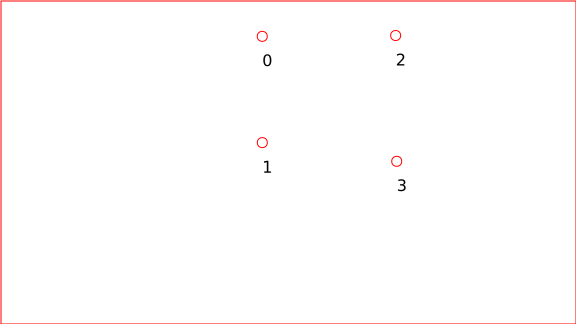

In [10]:
SVG(svg)

Размер флага известен (H x L), по визуально наблюдаемому соотношению сторон можно вычислить угол поворота полотна флага в сторону камеры

In [11]:
visible_height = D(0, 1, df)
mean_visible_height = (D(0, 1, df) + D(2, 3, df)) / 2 
mean_visible_width = (D(0, 2, df) + D(1, 3, df)) / 2
print("Высота кромки флага у флаштока, px: ", visible_height)
print("Средняя высота, px: ", mean_visible_height)
print("Средняя ширина, px: ", mean_visible_width)

Высота кромки флага у флаштока, px:  354.206401003
Средняя высота, px:  386.742685073
Средняя ширина, px:  448.459141326


### угол флага относительно оси камеры

In [12]:
# угол флага относительно оси камеры
# масштаб, пиксель на метр высоты (на расстоянии флагштока)
scale_h = visible_height / H

# видимая ширина (метры)
visible_width_m = mean_visible_width / scale_h
visible_width_m

1.1521469331208658

In [13]:
sin_a = visible_width_m / L
sin_a

0.75799140336899062

In [14]:
angle = np.arcsin(sin_a)
print("Угол флага по отношению к оси от камеры, градусов:", angle * 180 / np.pi)

Угол флага по отношению к оси от камеры, градусов: 49.2874429923


In [15]:
L_ = L * np.cos(angle)

print("""Расстояние "флагшток - передняя кромка флага" в направлении съёмки, метры:""", L_)

Расстояние "флагшток - передняя кромка флага" в направлении съёмки, метры: 0.991442103453


### Вычисление расстояния

$\alpha_0$ - угол кромки флака на флагштоке
$\alpha_1$ - угол ближней кромки флага
$X$ расстояние до флагштока
$L'$ -  расстояние "флагшток - передняя кромка флага" в направлении съёмки

Тогда:

$$
\begin{align}
\tan \alpha_0 &= \frac{H}{X} \\
\tan \alpha_1 &= \frac{H}{X - L'}
\end{align}
$$

Нa самом отображенни:

$h_0$ - высота отображения кромки флака на флагштоке
$h_1$ - высота отображения ближней кромки флага


Отношению $k$ размеров отображений кромок флага (насколько ближняя кажется больше задней кромки)

$$k = \frac{h_1}{h_0}$$

вычисляется по изображнию.


Упращенно, отношение тангенсов углов равно (примерно) отоношению отображений, т.е.

$$
\frac{h_1}{h_0} = \frac{\tan \alpha_1}{\tan \alpha_0}
$$

$$
k = \frac{\frac{H}{X - L'}} {\frac{H}{X}} = \frac{X}{X-L'}
$$

Откуда

$$k X - k L' = X$$
$$X (k -1) =  k L' $$
$$ X = \frac{k L'}{k - 1}$$


In [16]:
k = D(2, 3, df) / D(0, 1, df)
k

1.1837136990107642

In [17]:
X = k / (k - 1) * L_
X

6.3881115341601298

Если допустить, что правый нижний угол скомкался на 9% (~ 8 см)

In [18]:
k = D(2, 3, df) * 1.1 / D(0, 1, df)
X = k / (k - 1) * L_
X

4.2734384862100461